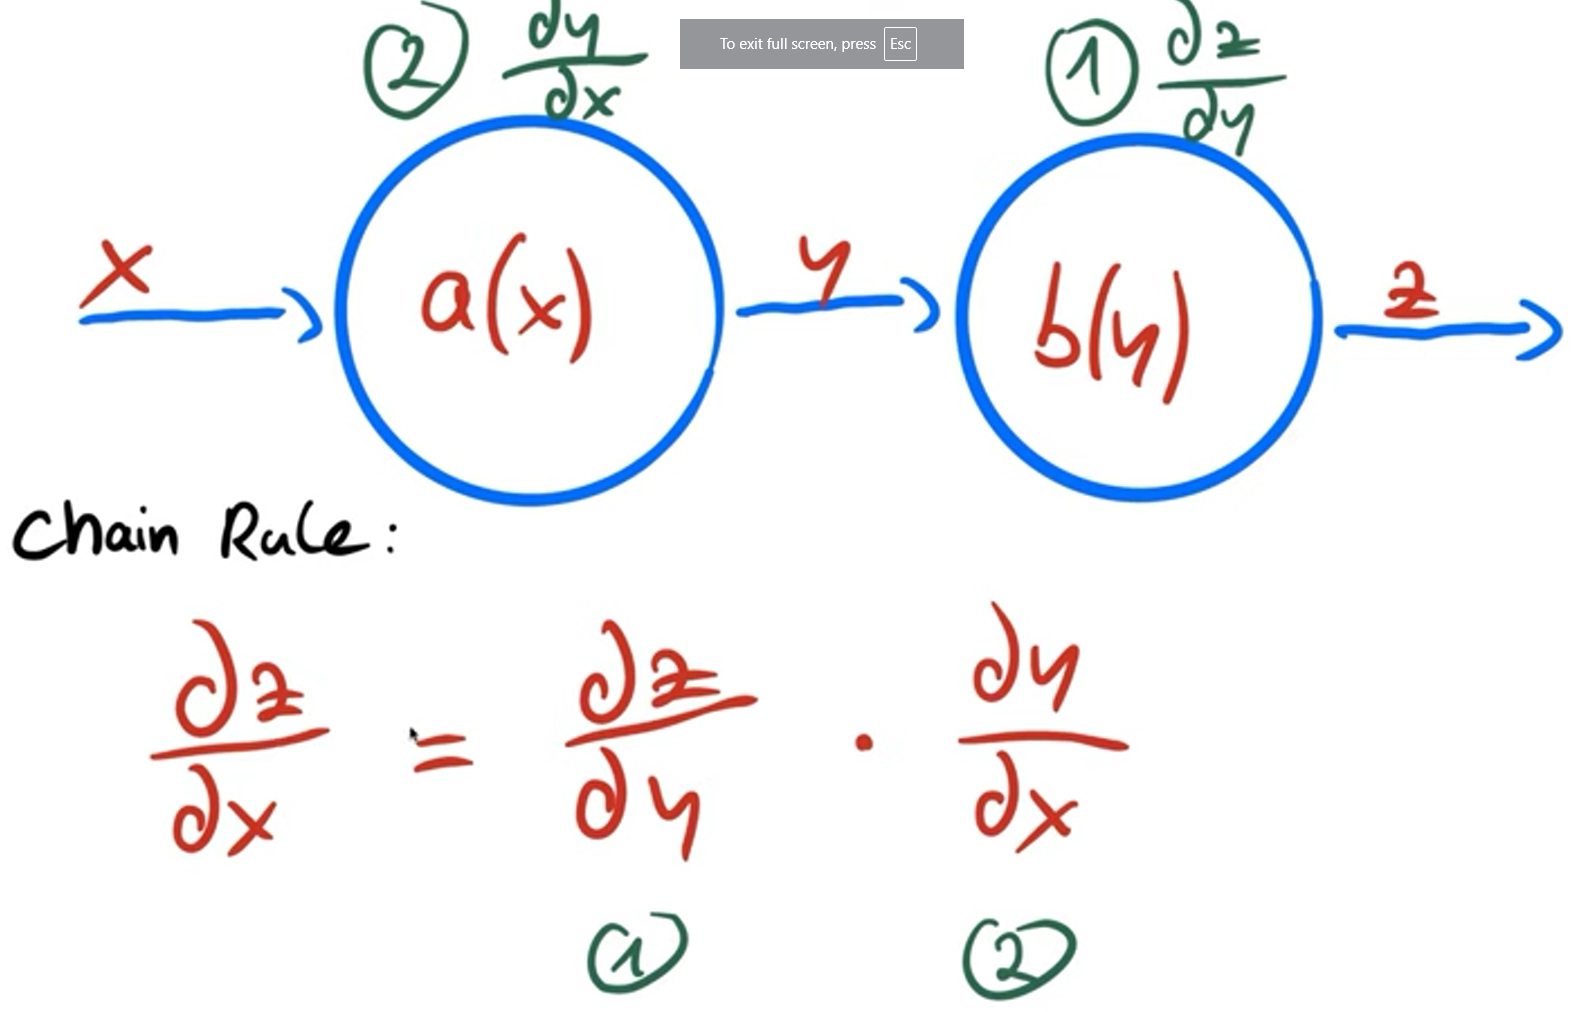

x -> a(x) -> y -> b(y) -> z 

x go into function a, output y, then output y go into function b, output z

In order to minimize z, we need to minimize y, and in order to minimize y, we need to minimize x.

So we need to use the chain rule to calculate the derivative of z with respect to x.
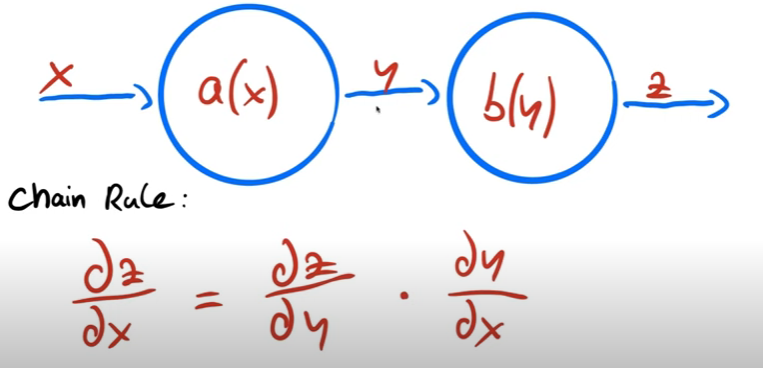

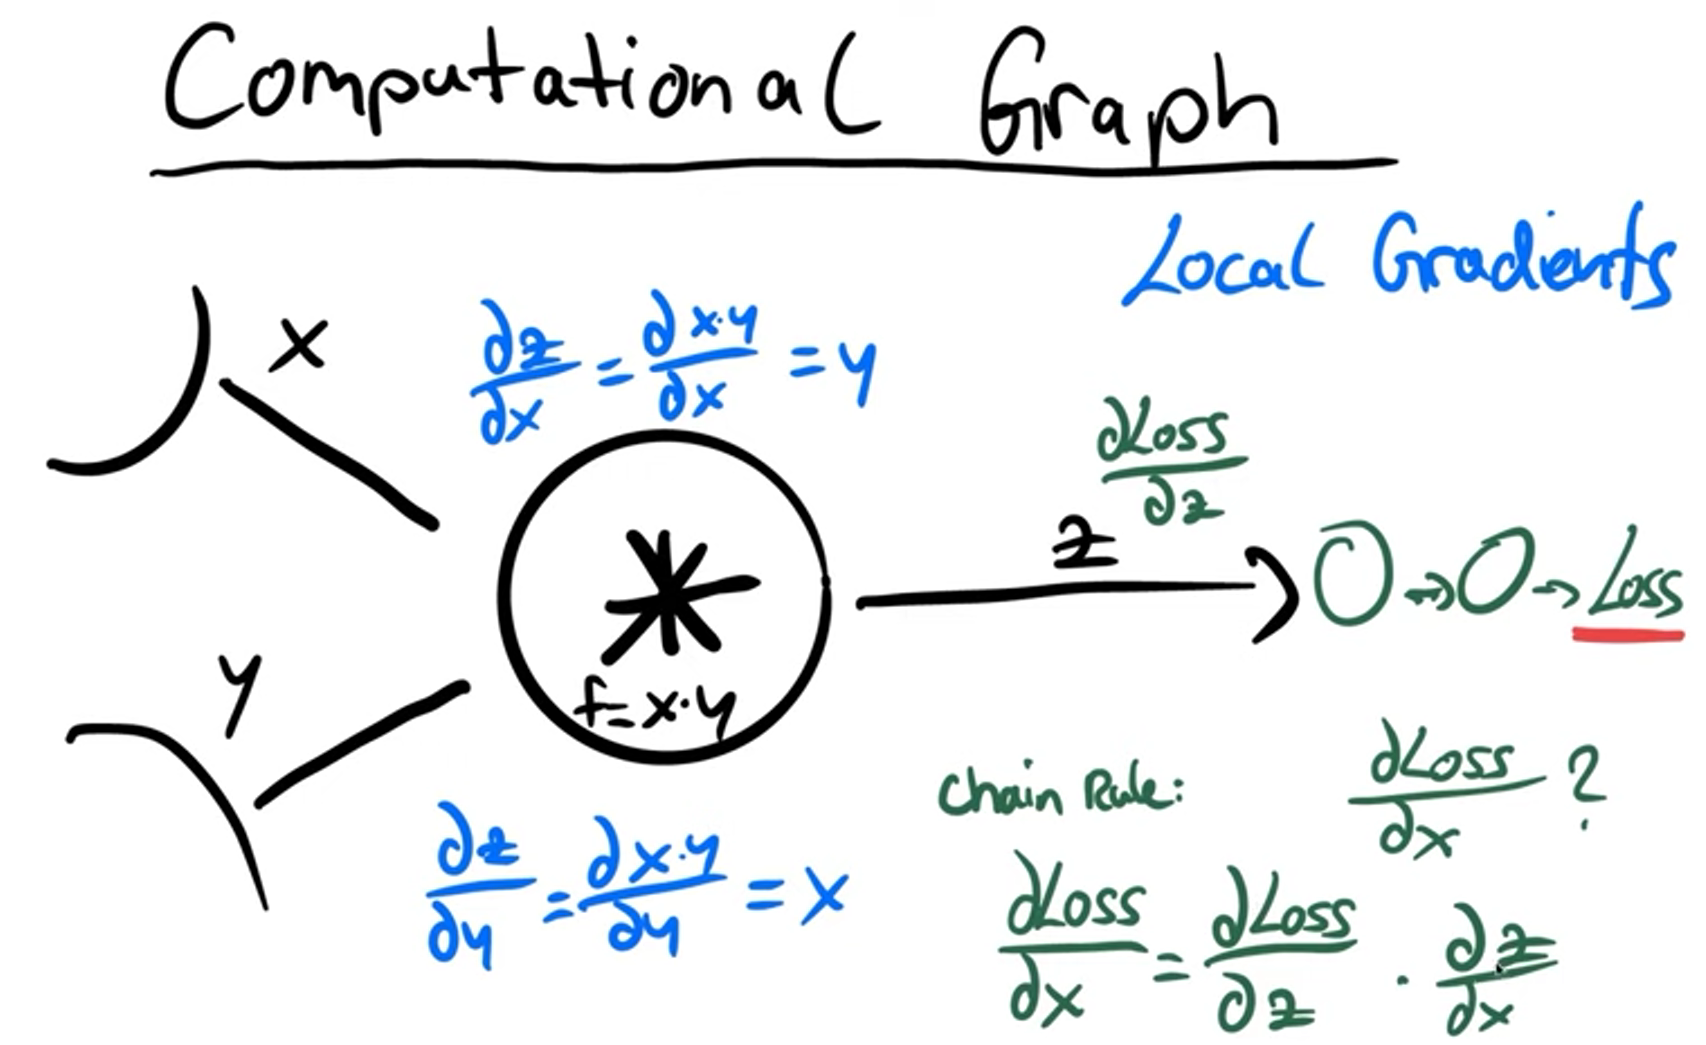

For every operation we do in our tensor with 'requires_grad=True', PyTorch will create a computational graph that will allow us to calculate the derivative of the final tensor with respect to the initial tensor.

# Step for Whole Epoch

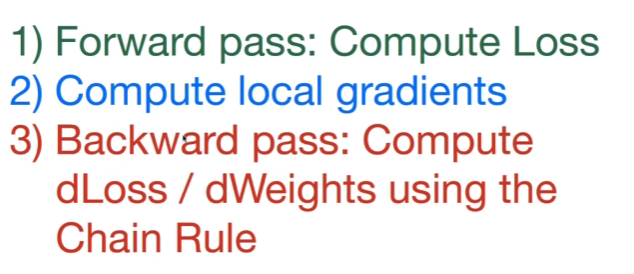

1. Forward Pass: Compute predicted y by passing x to the model
2. Compute Loss: Compute the loss between the predicted y and the true y
3. Backward Pass: Compute gradient of the loss with respect to all the learnable parameters

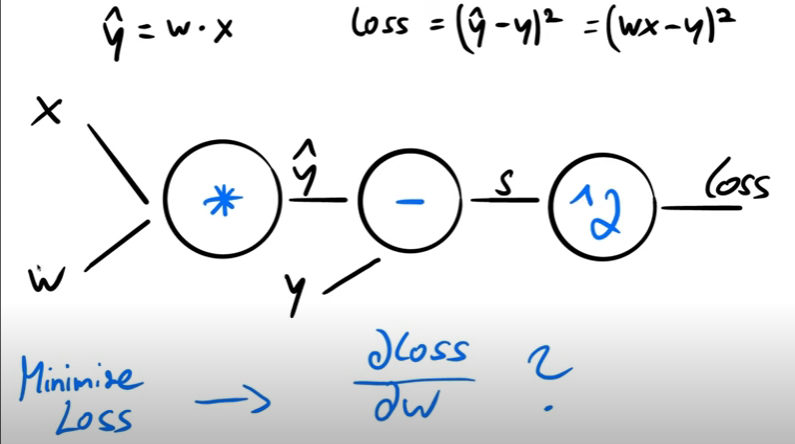

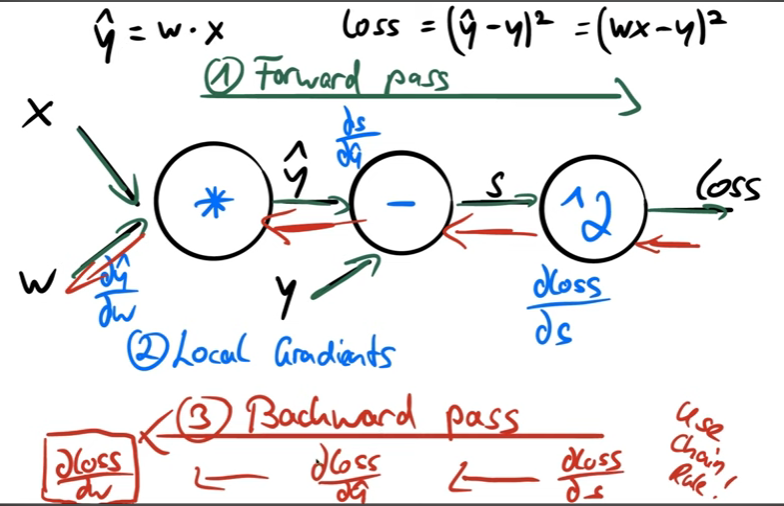

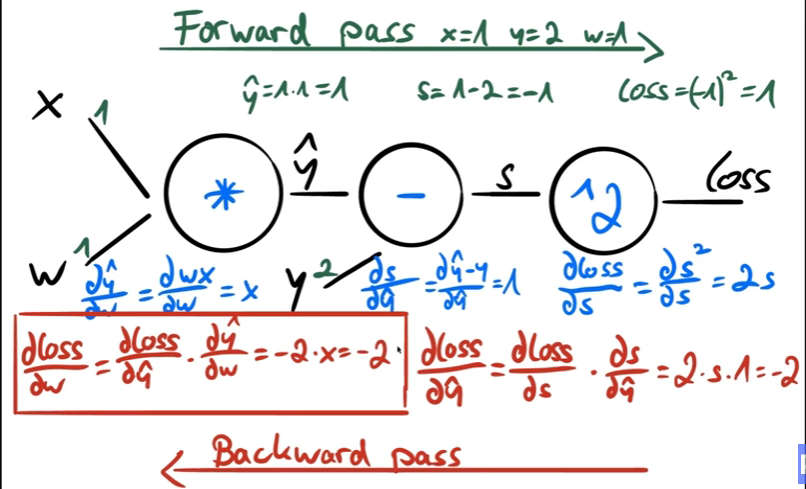

In [1]:
import torch

In [2]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

In [5]:
# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)
w

tensor(1., requires_grad=True)

In [6]:
# forward pass to compute loss
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [7]:
# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad) # dl/dw = 2(w*x - y) * 1 * x
# dl/dw = dl/dy * dy/dw = 2(y_predicted - y) * x

tensor(-2.)


In [8]:
# update weights
# next forward and backward pass...

# continue optimizing:
# update weights, this operation should not be part of the computational graph
with torch.no_grad():
    w -= 0.01 * w.grad
# don't forget to zero the gradients
w.grad.zero_()

# next forward and backward pass...

tensor(0.)